In [1]:
import os
import numpy as np
from HSI_class import HSI
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Load prediction
results_list = []
results_path = r"C:\Users\Asus TUF\Documents\code\TA\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_512\20250618_160253"

total = 0
for filename in os.listdir(results_path):
    file_path = os.path.join(results_path, filename)
    if os.path.isfile(file_path):  # Check if it's a file
        print(f"Processing file: {file_path}")
        pred_matrix = np.load(file_path)
        results_list.append(pred_matrix)
        total +=1
   

Processing file: C:\Users\Asus TUF\Documents\code\TA\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_512\20250618_160253\results 0 MyMethod.npy
Processing file: C:\Users\Asus TUF\Documents\code\TA\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_512\20250618_160253\results 1 MyMethod.npy
Processing file: C:\Users\Asus TUF\Documents\code\TA\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_512\20250618_160253\results 2 MyMethod.npy
Processing file: C:\Users\Asus TUF\Documents\code\TA\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_512\20250618_160253\results 3 MyMethod.npy
Processing file: C:\Users\Asus TUF\Documents\code\TA\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_512\20250618_160253\results 4 MyMethod.npy
Processing file: C:\Users\Asus TUF\Documents\code\TA\simsiam\simsiam\TESTING\new_mymethod\predictions\MyMethod_512\20250618_160253\results 5 MyMethod.npy
Processing file: C:\Users\Asus TUF\Documents\code\TA\simsiam\simsiam\TESTING

In [3]:
dataset_path = r"C:\Users\Asus TUF\Documents\code\TA\Hyperspectral oil spill detection datasets"

datasets = []
dataset_used = 1

max = total
i = 0
for filename in os.listdir(dataset_path):
    if i > max:
        break
    file_path = os.path.join(dataset_path, filename)
    if os.path.isfile(file_path):  # Check if it's a file
        print(f"Processing file: {file_path}")
        hsi = HSI(file_path)
        datasets.append(hsi)
    i += 1

Processing file: C:\Users\Asus TUF\Documents\code\TA\Hyperspectral oil spill detection datasets\GM01.mat
Processing file: C:\Users\Asus TUF\Documents\code\TA\Hyperspectral oil spill detection datasets\GM02.mat
Processing file: C:\Users\Asus TUF\Documents\code\TA\Hyperspectral oil spill detection datasets\GM03.mat
Processing file: C:\Users\Asus TUF\Documents\code\TA\Hyperspectral oil spill detection datasets\GM04.mat
Processing file: C:\Users\Asus TUF\Documents\code\TA\Hyperspectral oil spill detection datasets\GM05.mat
Processing file: C:\Users\Asus TUF\Documents\code\TA\Hyperspectral oil spill detection datasets\GM06.mat
Processing file: C:\Users\Asus TUF\Documents\code\TA\Hyperspectral oil spill detection datasets\GM07.mat
Processing file: C:\Users\Asus TUF\Documents\code\TA\Hyperspectral oil spill detection datasets\GM08.mat
Processing file: C:\Users\Asus TUF\Documents\code\TA\Hyperspectral oil spill detection datasets\GM09.mat
Processing file: C:\Users\Asus TUF\Documents\code\TA\Hy

10


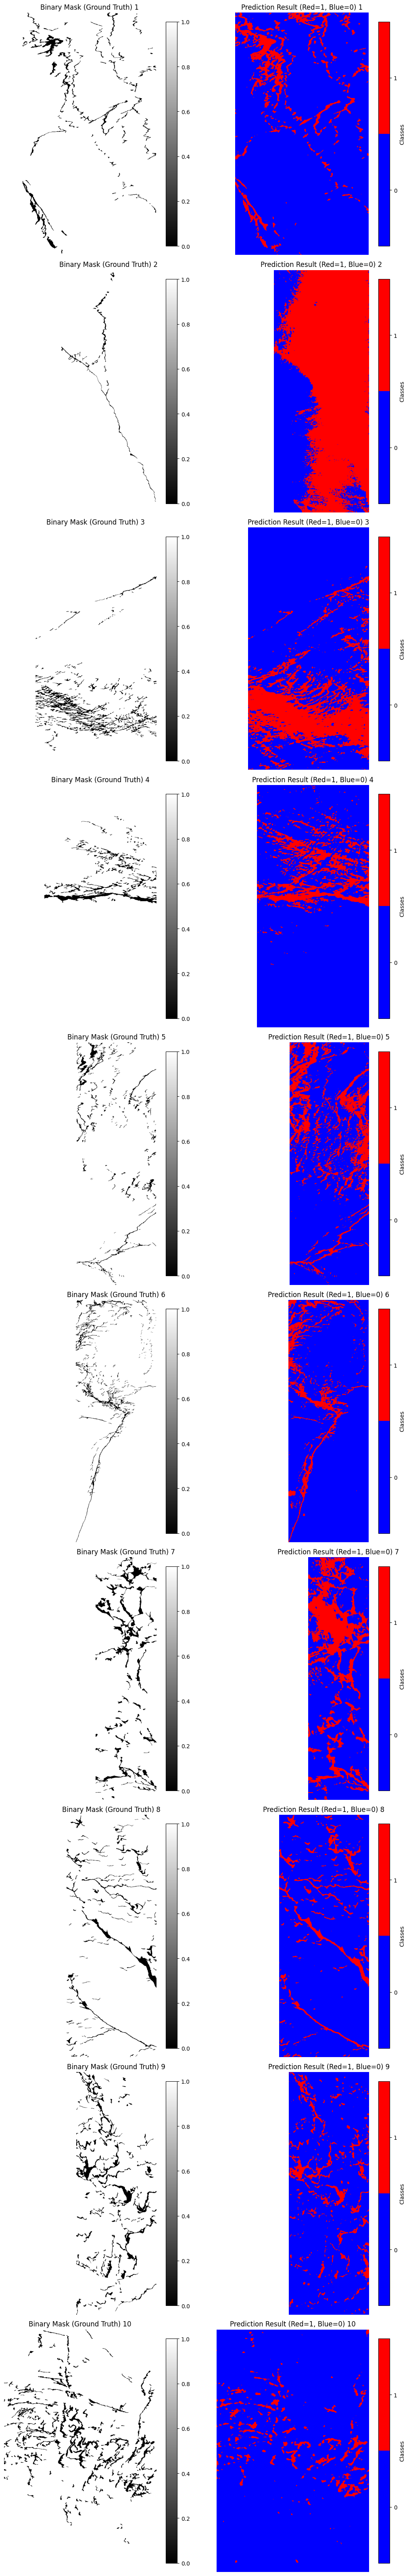

In [4]:
print(total)
# Define custom color map for prediction
custom_cmap = ListedColormap(['blue', 'red'])

# Create figure with 2 subplots side by side
fig, axs = plt.subplots(total, 2, figsize=(12, 64))

for i in range(total):
    dataset = datasets[i]
    gt = dataset.gt

    # --- First plot: Ground Truth (Binary Mask) ---
    im1 = axs[i][0].imshow(1 - gt, cmap='gray')
    axs[i][0].set_title(f'Binary Mask (Ground Truth) {i+1}')
    axs[i][0].axis('off')
    fig.colorbar(im1, ax=axs[i][0], fraction=0.046, pad=0.04)

    # --- Second plot: Predictions ---
    im2 = axs[i][1].imshow(results_list[i], cmap=custom_cmap, interpolation='nearest')
    axs[i][1].set_title(f'Prediction Result (Red=1, Blue=0) {i+1}')
    axs[i][1].axis('off')
    fig.colorbar(im2, ax=axs[i][1], ticks=[0, 1], label="Classes", fraction=0.046, pad=0.04)
    im2.set_clim(-0.5, 1.5)





plt.tight_layout()
plt.show()
